1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


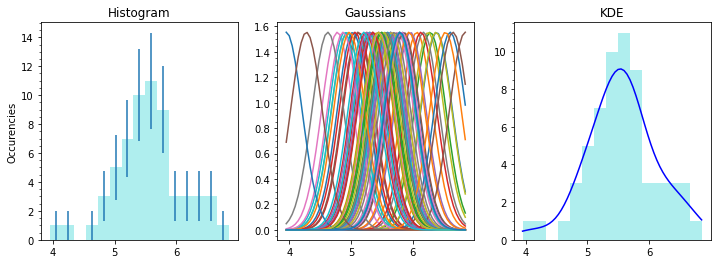

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import norm
from scipy.integrate import trapz

mean = np.random.random_sample()*np.random.randint(10)
std = np.random.random_sample()
N = np.random.randint(50, 101)
n_bins = int(N/4)

x = np.random.randn(N)*std + mean

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

bins = ax1.hist(x, bins=n_bins, color='paleturquoise')
ax1.set_title('Histogram')
ax1.set_ylabel('Occurencies')
ax1.yaxis.tick_left()
ax1.yaxis.set_minor_locator(AutoMinorLocator())    
error = np.sqrt(bins[0])
bins_center = (bins[1][:-1] + bins[1][1:])/2
ax1.errorbar(bins_center, bins[0], yerr=error, fmt='none')
    
std = 1.06*x.std()*(x.size**(-1/5))
x_grid = np.linspace(np.min(x), np.max(x), N)

gaussians = []
for sample in x:
    gaussian = norm.pdf(x_grid, sample, scale=std)
    gaussians.append(gaussian)
    ax2.plot(x_grid, gaussian)
    
ax2.set_title('Gaussians')
ax2.yaxis.tick_left()
ax2.yaxis.set_minor_locator(AutoMinorLocator())  

sog = np.sum(gaussians, axis=0)
area_sog = trapz(sog, x_grid)
# area_hist = trapz(x, x_grid)
area_hist = sum(np.diff(bins[1])*bins[0])
k_norm = area_sog/area_hist
norm_sog = sog/k_norm

ax3.set_title('KDE')
ax3.plot(x_grid, norm_sog, color="blue")
ax3.hist(x, bins=n_bins, color='paleturquoise')
ax3.yaxis.tick_left()
ax3.yaxis.set_minor_locator(AutoMinorLocator()) 

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-18 15:55:44--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2020-11-18 15:55:45--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3ddd38dd53f02ae10e592a906f.dl.dropboxusercontent.com/cd/0/inline/BDas44rfcCklmRpyqT85iQ8nB2wTspnyidc2DrzrNzvC8zs6FfRJZEPnUSpKt6RN8MiqzR4lRO_YvoXmtcp2LyVJe2CVkwcESyL0hECC9wUSfw/file# [following]
--2020-11-18 15:55:45--  https://uc3ddd38dd53f02ae10e592a906f.dl.dropboxusercontent.com/cd/0/inline/BDas44rfcCklmRpy

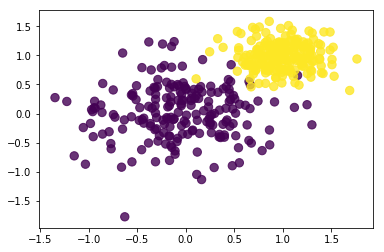

In [102]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

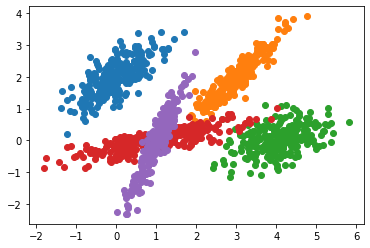

In [129]:
# Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(n_categories, N):
    dataset = []
    for i in range(n_categories):
        mean_i = np.random.randint(0, 5, size=2)
        cov_i = np.random.random(size=(2,2))
        sdp_cov_i = np.dot(cov_i, cov_i.transpose()) # generate a semidefinite positive random matrix
        class_i = np.random.multivariate_normal(mean_i, sdp_cov_i, N)
        dataset.append(class_i)

    return dataset

# Display the dataset in a scatter plot marking the two categories with different marker colors.
N = 250
n_categories = 5
data = generate_dataset(n_categories, N)

for i in range(n_categories):
    plt.scatter(data[i][:,0], data[i][:,1])

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [130]:
#Download the following dataset and load it as a pandas dataframe:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2020-11-18 15:56:46--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2020-11-18 15:56:46--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfa8946848e1fb2f65aa7ebe353.dl.dropboxusercontent.com/cd/0/inline/BDYOLNxaTjtmUHQuHKWQqmnk-qJVCXxj3SRxeDPa-jVc_FM7VPaHqO-3geSavmb-41G1-QGOlaufUqQYF3P-Xrib788KGDVHIHIs4I_h83IUxg/file# [following]
--2020-11-18 15:56:47--  https://ucfa8946848e1fb2f65aa7ebe353.dl.dropboxusercontent.com/cd/0/inline/BDYOLNxaTjtmUHQuHKWQqmnk-qJVCXxj3SRxeDPa-jVc_FM7VPaHqO-3ge

In [131]:
import numpy as np
import pandas as pd

np_residuals = np.load("residuals_261.npy", allow_pickle=True)
df_residuals = pd.DataFrame(np_residuals.item())

# Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
df_residuals = df_residuals[np.abs(df_residuals["residuals"])<2]
df_residuals

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [132]:
# perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_residuals["distances"], df_residuals["residuals"])

print("slope: %f    intercept: %f" % (slope, intercept))

slope: 0.003260    intercept: -0.154328


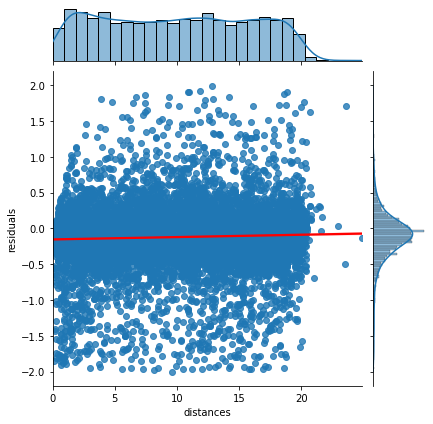

In [133]:
# plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
import seaborn as sns

sns.jointplot(x="distances", y="residuals", data=df_residuals, kind="reg", joint_kws={'line_kws':{'color':'r'}})

In [134]:
# Fill 3 numpy arrays
# x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
# y, the mean values of the "residuals", estimated in slices (bins) of "distance"
# erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"

x_borders = np.linspace(0, 20, 9)
x = (x_borders[1:] + x_borders[:-1])/2 

print(f"Distance bin centers x: {x}")

res_digitized = np.digitize(df_residuals["distances"], x)

y = [df_residuals["residuals"][res_digitized == i].mean() for i in range(1, len(x_borders))]
print(f"Mean values of the residuals in bins y: {y}")
       
erry = [df_residuals["residuals"][res_digitized == i].std() for i in range(1, len(x_borders))]
print(f"STD values of the residuals in bins erry: {erry}")

Distance bin centers x: [ 1.25  3.75  6.25  8.75 11.25 13.75 16.25 18.75]
Mean values of the residuals in bins y: [-0.16209792754311064, -0.13453115520958248, -0.09437151580031976, -0.0728359708071407, -0.0994930525401627, -0.14134470218955486, -0.14316205604783885, -0.047012114845945516]
STD values of the residuals in bins erry: [0.4133457442504932, 0.41370234146567647, 0.4434217198579661, 0.4403652040922352, 0.4773371656575184, 0.46643456373295344, 0.4086315389698175, 0.4075713374639706]


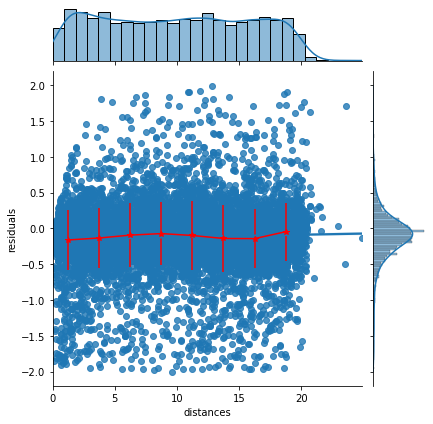

In [135]:
# Plot the profile plot on top of the scatter plot
import matplotlib.pyplot as plt

sns.jointplot(x="distances", y="residuals", data=df_residuals, kind="reg");
plt.errorbar(x=x, y=y , yerr=erry, marker = '*', color = 'r');